<a href="https://colab.research.google.com/github/mohyunyang/MyStudy/blob/master/DL_LanguageModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. N-gram
이때 임의의 개수를 정하기 위한 기준을 위해 사용하는 것이 n-gram입니다

- unigrams : an, adorable, little, boy, is, spreading, smiles
- bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
- trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
- 4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존합니다. 예를 들어 'An adorable little boy is spreading' 다음에 나올 단어를 예측하고 싶다고 할 때, n=4라고 한 4-gram을 이용한 언어 모델을 사용한다고 합시다. 이 경우, spreading 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려합니다.

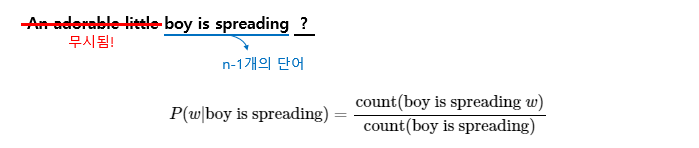

만약 갖고있는 코퍼스에서 boy is spreading가 1,000번 등장했다고 합시다. 그리고 boy is spreading insults가 500번 등장했으며, boy is spreading smiles가 200번 등장했다고 합시다. 그렇게 되면 boy is spreading 다음에 insults가 등장할 확률은 50%이며, smiles가 등장할 확률은 20%입니다. 확률적 선택에 따라 우리는 insults가 더 맞다고 판단하게 됩니다.



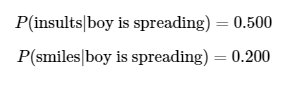

## 3. N-gram Language Model의 한계
- 앞과 뒷부분의 문맥이 전혀 연결 안될 수도 있음
- 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없음

물론 코퍼스 데이터를 어떻게 가정하느냐의 나름이고, 전혀 말이 안 되는 문장은 아니지만 여기서 지적하고 싶은 것은 n-gram은 뒤의 단어 몇 개만 보다 보니 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생긴다는 점입니다. 문장을 읽다 보면 앞 부분과 뒷부분의 문맥이 전혀 연결 안 되는 경우도 생길 수 있습니다. 결론만 말하자면, 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없습니다. 이를 토대로 n-gram 모델에 대한 한계점을 정리해보겠습니다.

> 희소 문제(Sparsity Problem)
문장에 존재하는 앞에 나온 단어를 모두 보는 것보다 일부 단어만을 보는 것으로 현실적으로 코퍼스에서 카운트 할 수 있는 확률을 높일 수는 있었지만, n-gram 언어 모델도 여전히 n-gram에 대한 희소 문제가 존재합니다.

-------------

# 한국어에서의 언어 모델(Language Model for Korean Sentences)

> 1. 한국어는 어순이 중요하지 않다.

이렇게 단어 순서를 뒤죽박죽으로 바꾸어놔도 한국어는 의미가 전달 되기 때문에 확률에 기반한 언어 모델이 제대로 다음 단어를 예측하기가 어렵습니다.

- ① 나는 운동을 합니다 체육관에서.
- ② 나는 체육관에서 운동을 합니다.
- ③ 체육관에서 운동을 합니다.
- ④ 나는 운동을 체육관에서 합니다.

> 2. 한국어는 교착어이다.


한국어는 교착어입니다. 이는 한국어에서의 언어 모델 작동을 어렵게 만듭니다. 띄어쓰기 단위인 어절 단위로 토큰화를 할 경우에는 문장에서 발생가능한 단어의 수가 굉장히 늘어납니다. 대표적인 예로 교착어인 한국어에는 조사가 있습니다. 영어는 기본적으로 조사가 없습니다. 하지만 한국어에는 어떤 행동을 하는 동사의 주어나 목적어를 위해서 조사라는 것이 있습니다.

가령 '그녀'라는 단어 하나만 해도 그녀가, 그녀를, 그녀의, 그녀와, 그녀로, 그녀께서, 그녀처럼 등과 같이 다양한 경우가 존재합니다. 그렇기 때문에, 한국어에서는 토큰화를 통해 접사나 조사 등을 분리하는 것은 중요한 작업이 되기도 합니다.



> 3. 한국어는 띄어쓰기가 제대로 지켜지지 않는다.

한국어는 띄어쓰기를 제대로 하지 않아도 의미가 전달되며, 띄어쓰기 규칙 또한 상대적으로 까다로운 언어이기 때문에 자연어 처리를 하는 것에 있어서 한국어 코퍼스는 띄어쓰기가 제대로 지켜지지 않는 경우가 많습니다. 토큰이 제대로 분리 되지 않는채 훈련 데이터로 사용된다면 언어 모델은 제대로 동작하지 않습니다.